# Мультикласова класифікація

У цьому домашньому завданні ми будемо працювати з наступним набором даних:
https://archive.ics.uci.edu/ml/datasets/car+evaluation

Ми передбачимо клас автомобілів відповідно до його характеристик. Клас може бути unacceptable, acceptable, good, very good.

Ми завантажуємо набір даних з hw_5_data.csv, наданого вам для виконання домашнього завдання.

0. Розташуйте всі імпорти під цією секцією.

In [100]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns  # Для кращої візуалізації

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier, plot_tree


import warnings

warnings.filterwarnings('ignore')

1.1. Завантажте набір даних у змінну df за допомогою Pandas. Виведіть перші 5 записів та форму набору даних.

In [69]:
df = pd.read_csv('hw_5_data.csv')
df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


1.2. Набір даних не має імен стовпців. Дайте наступні імена стовпцям:
`['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']`

In [70]:
df.columns= ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


2. Виведіть кількість унікальних значень кожної з незалежних змінних програмно. Формат числовий, а не візуальний. Приклад відповіді для одного стовпця:
```
med      432
high     432
vhigh    432
low      432
Name: buying, dtype: int64
```
Необхідно, щоб були назви стовпців, назви значень та кількість рядків із цим значенням.

In [71]:
for column in df.columns:
    print(f"{column}  має {df[column].nunique()} унікальних значень ")

buying  має 4 унікальних значень 
maint  має 4 унікальних значень 
doors  має 4 унікальних значень 
persons  має 3 унікальних значень 
lug_boot  має 3 унікальних значень 
safety  має 3 унікальних значень 
class  має 4 унікальних значень 


3. Виведіть скільки рядків відповідають кожному із значень цільової змінної. Дайте відповіді на два наступні запитання:   
  3.1. Ця змінна ординальна (порядкова) чи номінальна? Чому?
  
  3.2. Класифікація у цьому випадку буде збалансована чи незбалансована? Чому?

In [72]:
class_counts = df['class'].value_counts()
print(class_counts)


class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [98]:
df['class'].unique()


array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

## Ця змінна ординальна, тобто порядкова, тому що можна встановити порядок  unacceptable < acceptable < good < very good.  Цей порядок буде впливати на ціну, і інші фічі. 

## Класифікація незбалансована, оскільки  unacc  1209 набагато більше даних ніж у інших класах


4. Перевірте, чи відсутні значення у всіх змінних завантажених набору даних.

In [73]:
missing_values = df.isnull().sum()

# Виведення кількості відсутніх значень для кожної змінної
print(missing_values)

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64


## отже, немає пропущених значень.

5.1. Запишіть у змінну `x` всі незалежні змінні, у змінну `y` - цільову.



In [74]:
x= df.drop('class', axis=1)
y=df[['class']]


5.2. Розбийте дані на тренувальний та тестовий набори (ми знову ігноруємо валідацію для спрощення завдання). Визначте random_state рівним 42 та test_size рівним 0.33.

In [94]:
x_train_df, x_test_df, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

5.3. Виведіть форму та перші 5 записів отриманих x_train_df, x_test_df.

In [ ]:
x_train_df.shape 

In [76]:
x_test_df.shape

(346, 6)

In [77]:
x_train_df.head(5)

,buying,maint,doors,persons,lug_boot,safety
107,vhigh,high,2,2,small,low
900,med,vhigh,3,4,small,med
1708,low,low,5more,2,big,high
705,high,med,4,2,med,med
678,high,med,3,2,med,med


In [78]:
x_test_df.head(5)

,buying,maint,doors,persons,lug_boot,safety
599,high,high,4,2,big,low
932,med,vhigh,4,4,big,low
628,high,high,5more,2,big,high
1497,low,high,5more,4,med,med
1262,med,low,4,more,med,low


6.1. Виведіть типи даних усіх змінних у x_train.

In [79]:
x_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1381 entries, 107 to 1126
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1381 non-null   object
 1   maint     1381 non-null   object
 2   doors     1381 non-null   object
 3   persons   1381 non-null   object
 4   lug_boot  1381 non-null   object
 5   safety    1381 non-null   object
dtypes: object(6)
memory usage: 75.5+ KB


тип даних скрізь object. Але за потреби можна змінити на стрінг чи числові змінні. 

6.2. Усі незалежні змінні у нас ординальні. Закодуйте всі незалежні змінні за допомогою відповідного методу з sklearn.preprocessing.  
Вам необхідно встановити правильний порядок значень для кожної змінної при кодуванні так, щоб значення після кодування були впорядковані в порядку зростання.
Кодування значень {'high':1,'low':2,'med':3} буде ввжатись неправильним виконанням завдання.
Подумайте, як коректно застосовувати енкодер на трен. та тест. даних.
Результат кодування x_train_df та x_test_df запишіть відповідно у x_train, x_test.

In [80]:
# ваш код т# Приклад порядку для ілюстрації

# Визначення порядку для кожної категоріальної змінної
orders = [
    ['low', 'med', 'high', 'vhigh'],  # Для 'buying'
    ['low', 'med', 'high', 'vhigh'],  # Для 'maint'
    ['2', '3', '4', '5more'],         # Для 'doors'
    ['2', '4', 'more'],               # Для 'persons'
    ['small', 'med', 'big'],          # Для 'lug_boot'
    ['low', 'med', 'high']            # Для 'safety'
]

# Ініціалізація OrdinalEncoder з вказаними категоріями
encoder = OrdinalEncoder(categories = orders)

# Налаштування енкодера та трансформація даних
x_train = encoder.fit_transform(x_train_df)
x_test = encoder.transform(x_test_df)


6.3. Виведіть перші 5 записів x_train, x_test.

In [81]:
x_train[:5]

array([[3., 2., 0., 0., 0., 0.],
       [1., 3., 1., 1., 0., 1.],
       [0., 0., 3., 0., 2., 2.],
       [2., 1., 2., 0., 1., 1.],
       [2., 1., 1., 0., 1., 1.]])

In [82]:
x_test[:5]

array([[2., 2., 2., 0., 2., 0.],
       [1., 3., 2., 1., 2., 0.],
       [2., 2., 3., 0., 2., 2.],
       [0., 2., 3., 1., 1., 1.],
       [1., 0., 2., 2., 1., 0.]])

6.4. Виведіть отримані категорії енкодера.

In [83]:
encoder.categories


[['low', 'med', 'high', 'vhigh'],
 ['low', 'med', 'high', 'vhigh'],
 ['2', '3', '4', '5more'],
 ['2', '4', 'more'],
 ['small', 'med', 'big'],
 ['low', 'med', 'high']]

In [84]:
print("Закодовані категорії для кожної змінної:")
for i, cat in enumerate(encoder.categories_):
    print(f"Змінна {i}: {cat}")

Закодовані категорії для кожної змінної:
Змінна 0: ['low' 'med' 'high' 'vhigh']
Змінна 1: ['low' 'med' 'high' 'vhigh']
Змінна 2: ['2' '3' '4' '5more']
Змінна 3: ['2' '4' 'more']
Змінна 4: ['small' 'med' 'big']
Змінна 5: ['low' 'med' 'high']


7.1. Навчіть на отриманих даних логістичну регресію c random_state=42 та іншими параметрами по замовчуванню.

In [85]:
from sklearn.linear_model import LogisticRegression 

lr = LogisticRegression(random_state = 42)
lr.fit(x_train, y_train)


LogisticRegression(random_state=42)

7.2. Зробіть прогнози за допомогою отриманої моделі за допомогою методу predict. 

In [86]:
y_pred = lr.predict(x_test)

7.3. Виведіть метрики якості за допомогою classification_report.

In [87]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.69      0.58      0.63        77
        good       0.57      0.27      0.36        15
       unacc       0.88      0.95      0.91       237
       vgood       0.78      0.82      0.80        17

    accuracy                           0.83       346
   macro avg       0.73      0.66      0.68       346
weighted avg       0.82      0.83      0.82       346


Accuracy у цьому пункті має бути близько 0.82. 

7.4. Яку метрику якості ви рекомендуєте використовувати для порівняння різних моделей та вибору найкращої? Чому? Метрика - це одне число, що характеризує якість передбачень моделі.

Я раджу дивитись на пару precision та  recall Якщо це має бути одна метрика то f1-score підійде, оскільки це середнє гармонійне від precision та recall. У статті https://medium.com/p/bec2bbc38aa6 детально пояснено чому це так. і чому  accuracy може сприяти утворенню хибного враження.

8.1. Навчіть Decision Tree з sklearn з глибиною 4 за тими ж даними. Обчисліть прогнози, знайдіть метрику якості на test даних. Порівняйте з регресією логістики. Яка модель краща?

In [88]:
# Ініціалізація та навчання моделі Decision Tree
dtс = DecisionTreeClassifier(max_depth=4, random_state=42)
dtс.fit(x_train, y_train)

# Прогнозування на тестових даних
y_pred_dt = dtс.predict(x_test)

# Виведення метрик якості для моделі Decision Tree
print(classification_report(y_test, y_pred_dt))


              precision    recall  f1-score   support

         acc       0.79      0.74      0.77        77
        good       0.36      1.00      0.53        15
       unacc       0.97      0.95      0.96       237
       vgood       0.00      0.00      0.00        17

    accuracy                           0.86       346
   macro avg       0.53      0.67      0.56       346
weighted avg       0.86      0.86      0.85       346


8.2. Виведіть параметри моделі Decision Tree.

In [89]:
params = dtс.get_params()
print("Параметри моделі Decision Tree:")
for param, value in params.items():
    print(f"{param}: {value}")

Параметри моделі Decision Tree:
ccp_alpha: 0.0
class_weight: None
criterion: gini
max_depth: 4
max_features: None
max_leaf_nodes: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
monotonic_cst: None
random_state: 42
splitter: best


<font color='blue'>**[Optional]**</font> 8.3. Візуалізуйте отримане дерево в будь-якому з існуючих методів. Зображення повинно мати графік з критеріями у вузлах, класах та кількості елементів у кожному аркуші.

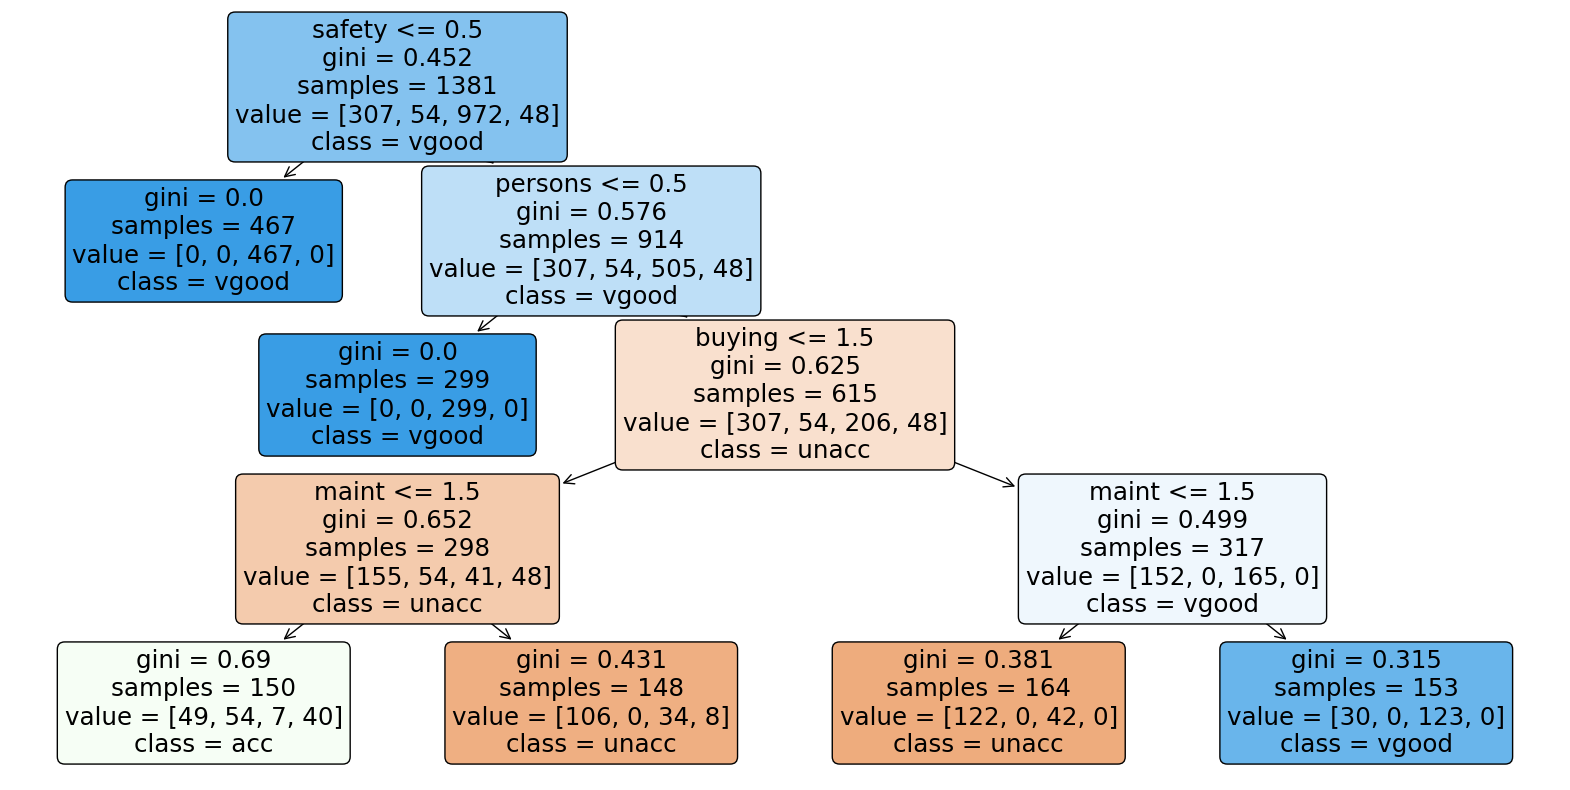

In [99]:


# Навчання моделі Decision Tree
# Припустимо, що модель вже навчена і збережена в змінній dt

# Візуалізація дерева
plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, rounded=True, 

          class_names=['unacc', 'acc', 'vgood','good'],  # Приклад назв класів
          feature_names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])  # Приклад назв ознак
plt.show()


9.1. Виконайте пошук гіперпараметрів для DecisionTree за сіткою за допомогою sklearn. Встановіть сітку з параметрів самостійно на основі припущень, що може покращити роботу дерева.
Вам вдалося знайти модель, яка працює краще, ніж побудована у пункті 8.1?

In [91]:


param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, 10, 15],
    'min_samples_split': [1, 2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 7, 10]
}

# Ініціалізація GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy')

# Навчання моделі з GridSearchCV на тренувальних даних
grid_search.fit(x_train, y_train)

# Виведення найкращих параметрів та найкращої точності
print("Найкращі параметри:", grid_search.best_params_)
print("Найкраща точність:", grid_search.best_score_)


Найкращі параметри: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
Найкраща точність: 0.974658609323497


9.2. Виведіть claasification report фінальної моделі пошуку гіперпараметрів.

In [92]:
# Використання найкращої моделі для прогнозування на тестових даних
best_dt = grid_search.best_estimator_
y_pred_best_dt = best_dt.predict(x_test)

# Оцінка якості найкращої моделі на тестових даних
print(classification_report(y_test, y_pred_best_dt))

              precision    recall  f1-score   support

         acc       0.96      0.92      0.94        77
        good       0.75      0.80      0.77        15
       unacc       0.99      1.00      0.99       237
       vgood       0.83      0.88      0.86        17

    accuracy                           0.97       346
   macro avg       0.88      0.90      0.89       346
weighted avg       0.97      0.97      0.97       346


9.3. Виведіть матрицю помилок для кращої моделі у пошуку гіперпараметрів. Відобразіть матрицю візуально (у вигляді графіка із зафарбованими за значеннями клітинами або у вигляді таблиці із зафарбовуванням фону).

Text(70.72222222222221, 0.5, 'Реальні мітки')

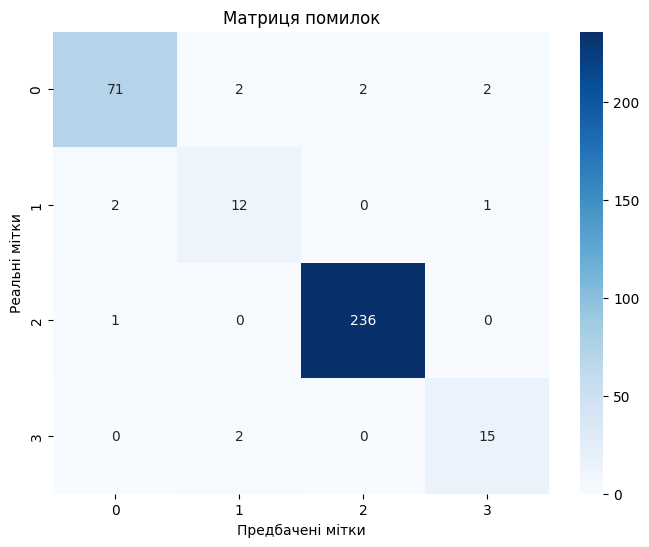

In [60]:


# Обчислення матриці помилок
# Припустимо, що y_test і y_pred_final вже визначені
cm = confusion_matrix(y_test, y_pred_best_dt)

# Візуалізація матриці помилок
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_title('Матриця помилок')
ax.set_xlabel('Предбачені мітки')
ax.set_ylabel('Реальні мітки')

# Налаштування міток для осей
# Припустимо, що у нас є список міток класів: labels = ['клас1', 'клас2', ..., 'класN']
# ax.set_xticklabels(labels, rotation=45)
# ax.set_yticklabels(labels, rotation=45)

#plt.show()


9.4. Зробіть висновок, які класи, з якими моделями найбільше плутаються?

Все добре. Помилки (тобто значення за межами головної діагоналі) досягають максимум значення 2. Тобто максимум дві полилкаи